In [106]:
using PyPlot
using JuLIP
using JuLIP.ASE, JuLIP.Potentials, JuLIP.Constraints 

myplot(X::Matrix) = plot(X[1,:], X[2,:], ".")
PyPlot.plot(at::AbstractAtoms) = myplot(mat(positions(at)))

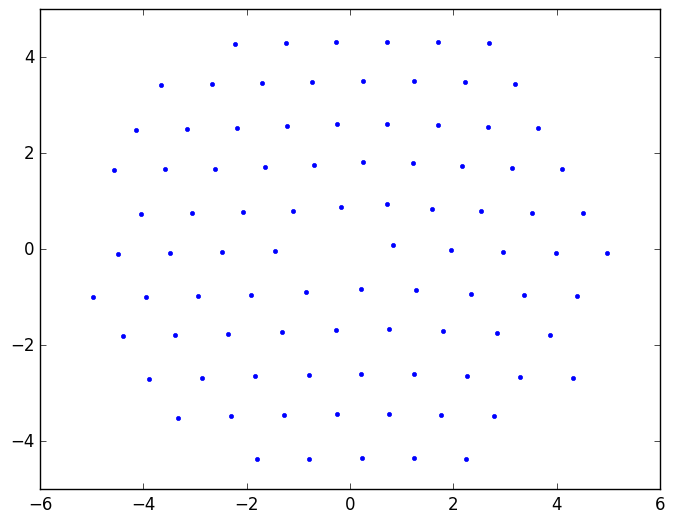

a0 = 1.047370282888717


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3371a5350>

In [107]:
# anisotropic elasticity solution for an FCC edge dislocation
reload("JuLIPMaterials")
Tri = JuLIPMaterials.TriangularLattice
lj = lennardjones()
at = Tri.edge_cluster(5.1, calc = lj)
plot(at)


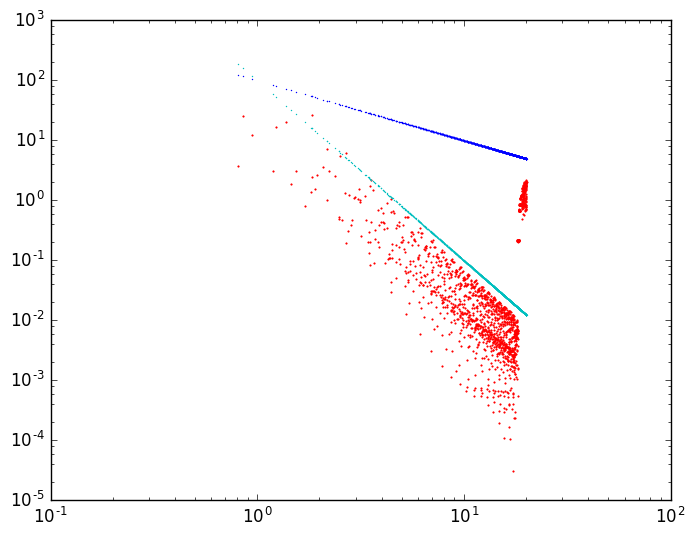

a0 = 1.0


2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3368cdf50>
 PyObject <matplotlib.lines.Line2D object at 0x3342140d0>

In [99]:
# anisotropic elasticity solution for an FCC edge dislocation
reload("JuLIPMaterials")
Tri = JuLIPMaterials.TriangularLattice
lj = lennardjones()
at = Tri.edge_cluster(20.1) # , calc = lj)
# at = Tri.edge_geom(L = 20, calc = lj)
f = norm.(forces(lj, at))
r = norm.(positions(at))
loglog(r,f, "r.", markersize=2)
loglog(r,1e2 * r.^(-1), "b.", r, 1e2 * r.^(-3), "c.", markersize=1)

In [122]:
Rdom = 7.1 
Rqm = 5.1
at = Tri.edge_cluster(Rdom)
r = norm.(positions(at))
Ifree = find(r .<= Rqm)
set_calculator!(at, lennardjones())
set_constraint!(at, JuLIP.Constraints.FixedCell2D(at; free = Ifree))
JuLIP.Solve.minimise!(at, precond = JuLIP.Preconditioners.Exp(at, r0 = 1.0), verbose=2);


Iter     Function value   Gradient norm 
     0    -1.074781e+03     2.678530e+01
     1    -1.077017e+03     2.109542e+01
     2    -1.077893e+03     7.236455e+00
     3    -1.078420e+03     8.736808e+00
     4    -1.078697e+03     5.435316e+00
     5    -1.078783e+03     2.898040e+00
     6    -1.078827e+03     1.238086e+00
     7    -1.078858e+03     1.453400e+00
     8    -1.078891e+03     1.627300e+00
     9    -1.078925e+03     1.152714e+00
    10    -1.078942e+03     1.550929e+00
    11    -1.078950e+03     5.466255e-01
    12    -1.078953e+03     4.724031e-01
    13    -1.078953e+03     3.129707e-01
    14    -1.078954e+03     1.628528e-01
    15    -1.078954e+03     1.122932e-01
    16    -1.078954e+03     6.593719e-02
    17    -1.078954e+03     2.934283e-02
    18    -1.078954e+03     2.556257e-02
    19    -1.078954e+03     3.548411e-02
    20    -1.078954e+03     2.074525e-02
    21    -1.078954e+03     1.567379e-02
    22    -1.078954e+03     1.536854e-02
    23    -1.078

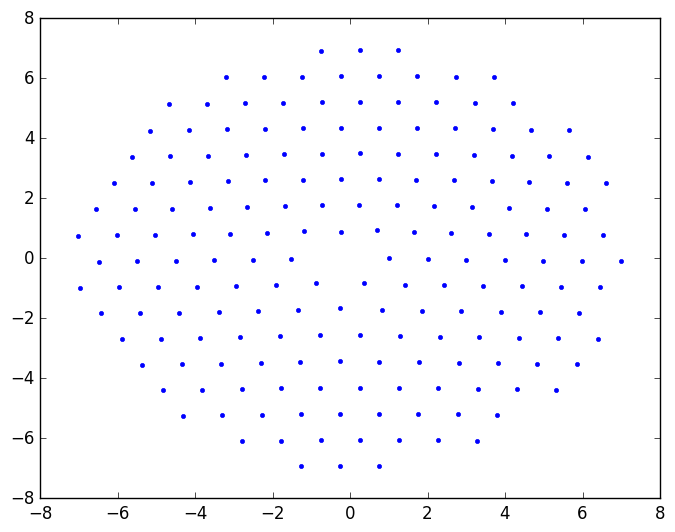

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x33abf1690>

In [123]:
plot(at)

# Now with TIGHT-BINDING 

In [100]:
reload("TightBinding")
TB = TightBinding

r0best = 1.1636927516282758   # hand-tuned
Tb(r0) = TB.ToyModels.ToyTBModel(r0=r0)
Tb() = Tb(r0best)


Tb (generic function with 2 methods)

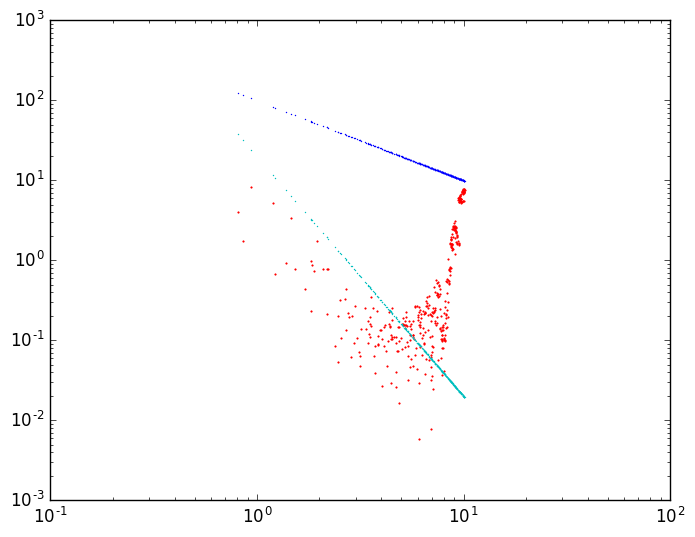

a0 = 1.0


2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3360b7550>
 PyObject <matplotlib.lines.Line2D object at 0x3341de0d0>

In [101]:
reload("JuLIPMaterials")
Tri = JuLIPMaterials.TriangularLattice
tb = Tb() 
at = Tri.edge_cluster(10.1)
f = norm.(forces(tb, at))
r = norm.(positions(at))
loglog(r,f, "r.", markersize=2)
loglog(r,1e2 * r.^(-1), "b.", r, 2e1 * r.^(-3), "c.", markersize=1)

In [118]:
# and optimise the damn thing 
reload("JuLIPMaterials")
Tri = JuLIPMaterials.TriangularLattice

Rdom = 7.1 
Rqm = 5.1
at = Tri.edge_cluster(Rdom)
r = norm.(positions(at))
Ifree = find(r .<= Rqm)
set_calculator!(at, Tb())
set_constraint!(at, JuLIP.Constraints.FixedCell2D(at; free = Ifree))

JuLIP.Solve.minimise!(at, precond = JuLIP.Preconditioners.Exp(at, r0 = 1.0), verbose=2);

Iter     Function value   Gradient norm 
     0    -1.042531e+03     8.183973e+00


     1    -1.044294e+03     6.127255e+00
     2    -1.045597e+03     3.672973e+00
     3    -1.046206e+03     3.740888e+00
     4    -1.046855e+03     2.392391e+00
     5    -1.047489e+03     5.321496e+00
     6    -1.047668e+03     6.391383e+00
     7    -1.048528e+03     1.355642e+00
     8    -1.048673e+03     6.687580e-01
     9    -1.048691e+03     2.716887e-01
    10    -1.048696e+03     1.428802e-01
    11    -1.048698e+03     1.354717e-01
    12    -1.048701e+03     1.834530e-01
    13    -1.048706e+03     1.371465e-01
    14    -1.048710e+03     1.711810e-01
    15    -1.048712e+03     8.845722e-02
    16    -1.048712e+03     5.904479e-02
    17    -1.048712e+03     2.830251e-02
    18    -1.048713e+03     1.671751e-02
    19    -1.048713e+03     5.524682e-03
    20    -1.048713e+03     4.083986e-03
    21    -1.048713e+03     1.756185e-03
    22    -1.048713e+03     1.095514e-03
    23    -1.048713e+03     4.769483e-04
    24    -1.048713e+03     3.452431e-04
    25    -1.048

In [119]:
norm(gradient(at), Inf)

4.183500611563973e-6

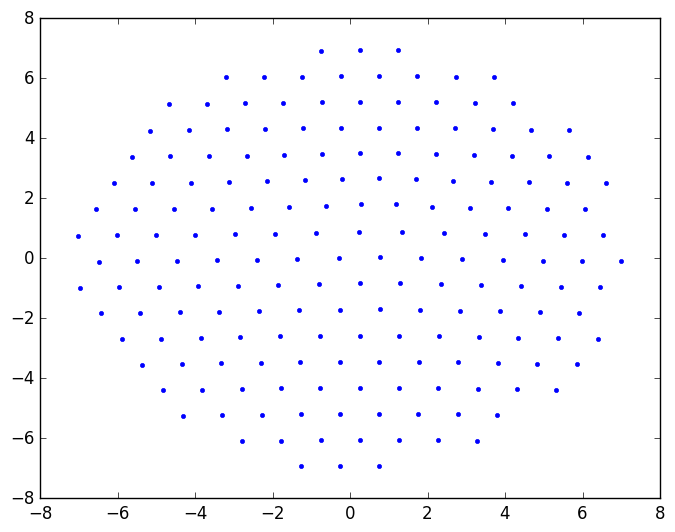

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x33870b5d0>

In [120]:
plot(at)

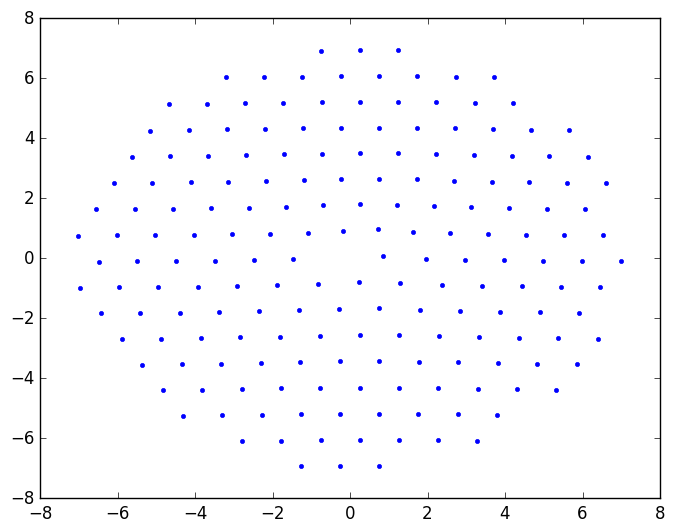

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3388e11d0>

In [121]:
plot(Tri.edge_cluster(7.1))